In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import librosa
import librosa.display
import os 
import torch.nn as nn

ModuleNotFoundError: No module named 'librosa'

# EDA

In [49]:
path='/home/yazmine/Desktop/Big Data ORIE 5741/ORIE5741_Project/genres_original'
os.listdir(path)

for i in os.listdir(path):
    count=0
    class_path=path+'/'+str(i)+'/'
    
    for d in os.listdir(class_path):
        if os.path.isfile(os.path.join(class_path, d)):
            count += 1
    print ('For %s genres, there are %d audio files.'%(i,count))

For blues genres, there are 100 audio files.
For pop genres, there are 100 audio files.
For rock genres, there are 100 audio files.
For disco genres, there are 100 audio files.
For reggae genres, there are 100 audio files.
For country genres, there are 100 audio files.
For hiphop genres, there are 100 audio files.
For metal genres, there are 100 audio files.
For jazz genres, there are 100 audio files.
For classical genres, there are 100 audio files.


# Sample Rate & Audio Length & Waveform

Sample rate: 22050
Audio Length: 30.013333333333332


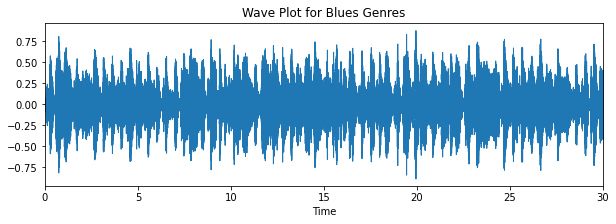

In [50]:
blue_sample='./genres_original/blues/blues.00000.wav'
x,sr = librosa.load(blue_sample)
print('Sample rate:',sr)
print('Audio Length:',len(x)/sr)
plt.figure(figsize=(10,3))
plt.title("Wave Plot for Blues Genres")
librosa.display.waveplot(x,sr)


# Spectogram

Text(0.5, 1.0, 'Spectogram for Blues Genres')

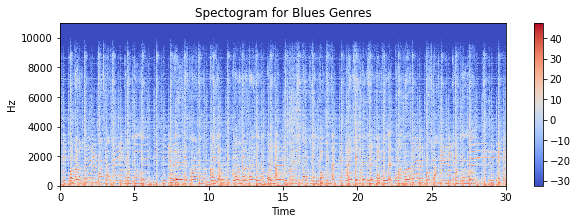

In [119]:
stft=librosa.stft(x)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(10,3))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()
plt.title("Spectogram for Blues Genres")

# Spectral Roll-Off

Text(0.5, 1.0, 'Spectral Roll-off for Blues Genres')

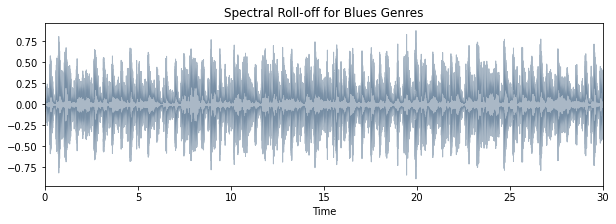

In [124]:
spectral_rolloff=librosa.feature.spectral_rolloff(x+0.01,sr=sr)[0]
plt.figure(figsize=(10,3))
librosa.display.waveplot(x,sr=sr,alpha=0.4,color="#2B4F72")
plt.title("Spectral Roll-off for Blues Genres")

# Chroma Features

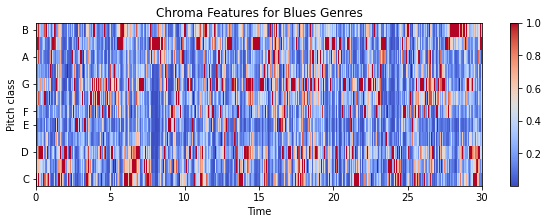

In [126]:
chroma = librosa.feature.chroma_stft(x,sr=sr)
plt.figure(figsize=(10,3))
librosa.display.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features for Blues Genres")
plt.show()

# Zero Crossing Rate

Text(0.5, 1.0, 'Zero Crossing Rate for Blues Genres')

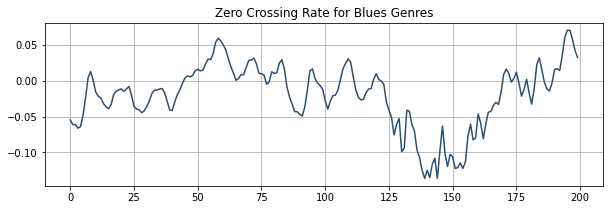

In [128]:
start=1000
end=1200
plt.figure(figsize=(10,3))
plt.plot(x[start:end],color="#2B4F72")
plt.grid()
plt.title("Zero Crossing Rate for Blues Genres")

In [55]:
def process_embeddings(self):
        TARGET_SR = 16000
        MAX_LENGTH = TARGET_SR * 60
        feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-base-960h")
        wav2vec_model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
        wav2vec_model.eval()
        for p in wav2vec_model.parameters():
            p.requires_grad = False
       
        audio_file = self.fp
        wv, sr = torchaudio.load(audio_file)
        wv = torchaudio.transforms.Resample(sr, 16000)(wv)
        proc_wv = wv[0,:]
        outputs = []
        for start in range(0, proc_wv.shape[0], MAX_LENGTH):
            features = feature_extractor(proc_wv[start:start+MAX_LENGTH], sampling_rate=TARGET_SR, padding=False, return_tensors="pt").input_values
            output = wav2vec_model(features).last_hidden_state
            output = output.detach().cpu()
            outputs.append(output)
        outputs = torch.cat(outputs, dim=1).squeeze()
        embeds =  np.array(outputs.mean(0))
        embeds = embeds.reshape(len(embeds),1)
        
        return embeds

# CNN Features

In [56]:
cnn_feature=pd.read_csv('CNN_featrues.csv').drop(columns=['Unnamed: 0'])
cnn_feature
cnn_feature=cnn_feature.iloc[0:200,:]

# MFCC 

In [112]:
df=pd.read_csv('./mfcc/features_3_sec.csv')
df=df.drop(labels="filename",axis=1)
df=df[(df.label=='country')|(df.label=='hiphop')]
df.label.value_counts()

hiphop     998
country    997
Name: label, dtype: int64

In [132]:
df.columns

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'

# Correlation Heatmap

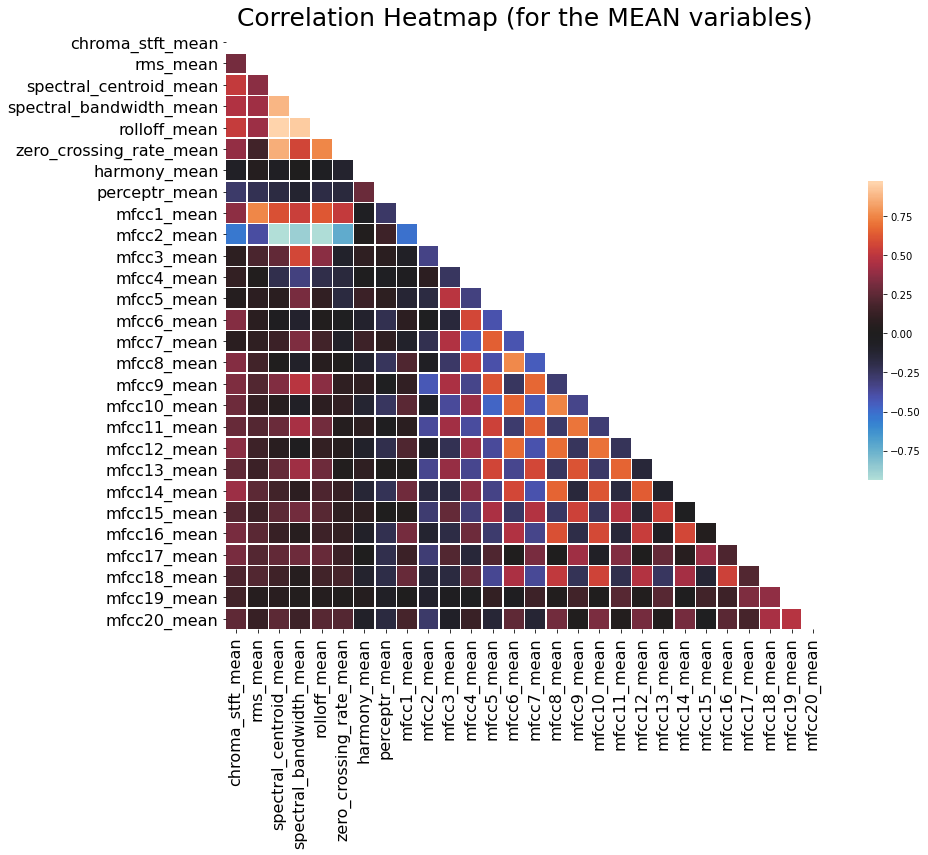

In [140]:
# Computing the Correlation Matrix
import seaborn as sns
data=df
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},)

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);
plt.savefig("Corr Heatmap.jpg")

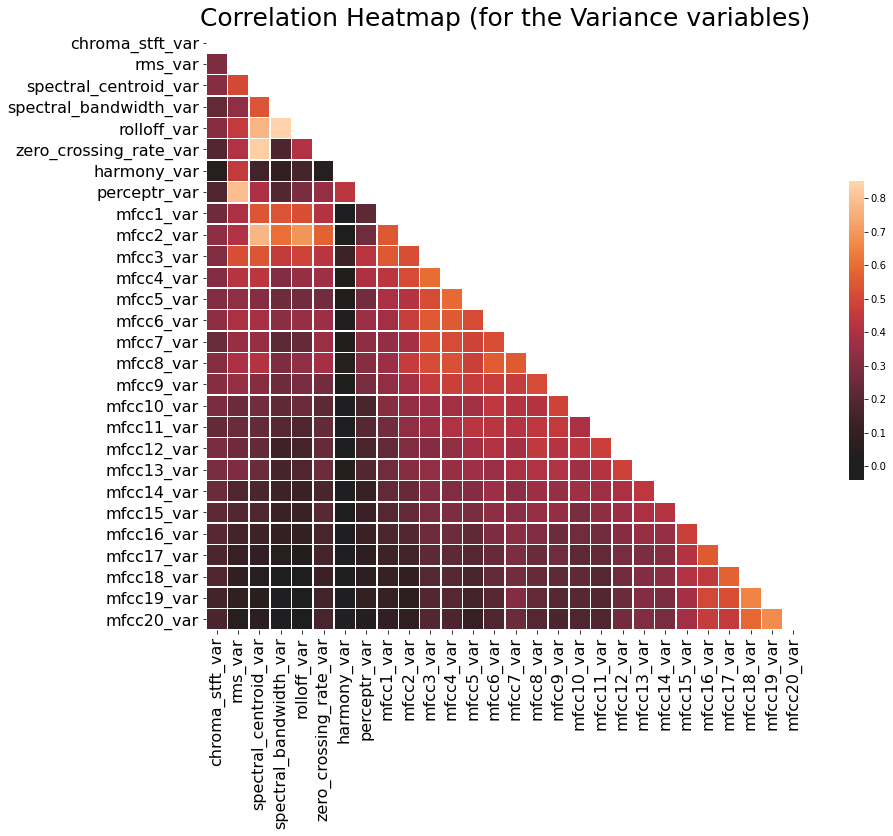

In [145]:
# Computing the Correlation Matrix
import seaborn as sns
data=df
spike_cols = [col for col in data.columns if 'var' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},)

plt.title('Correlation Heatmap (for the Variance variables)', fontsize = 25)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);
plt.savefig("Corr Heatmap.jpg")

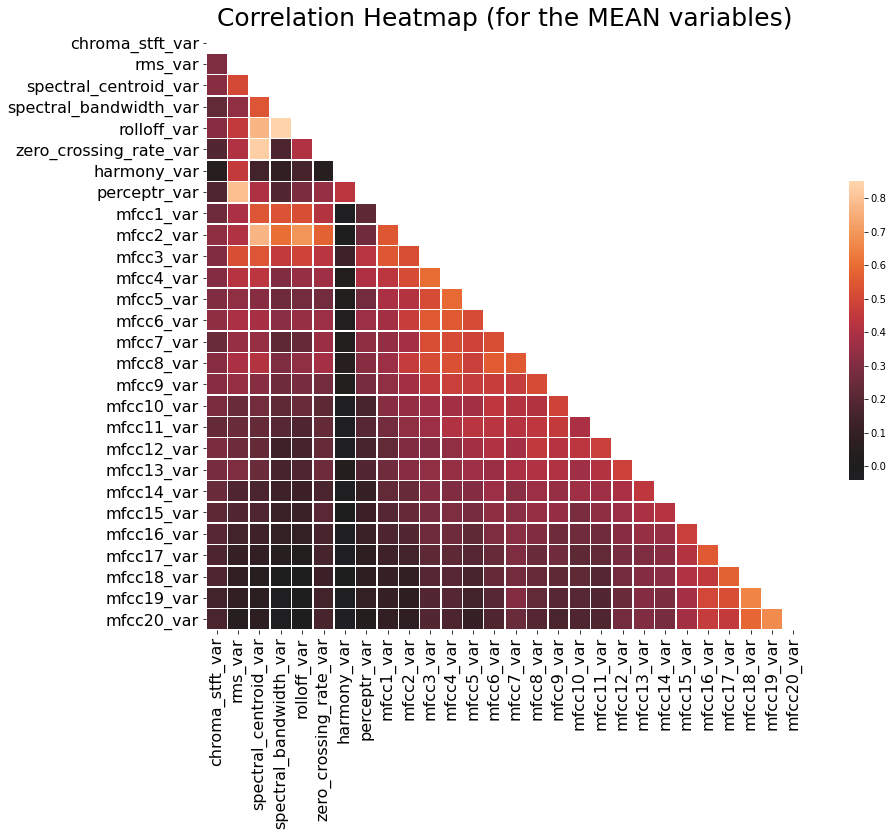

In [142]:
# Computing the Correlation Matrix
import seaborn as sns
data=df
spike_cols = [col for col in data.columns if 'var' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},)

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);
# plt.savefig("Corr Heatmap.jpg")

# Standarized and Train Test split 

In [113]:
X=StandardScaler().fit_transform(np.array(df.iloc[:,:-1],dtype=float))
# X=StandardScaler().fit_transform(np.array(cnn_feature,dtype=float))
class_list=df.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_list)
print(X.shape,y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1995, 58) (1995,)
(1336, 58) (659, 58) (1336,) (659,)


In [114]:
from scipy import spatial
1-spatial.distance.cosine(X[0], X[999])

-0.030826758146621946

In [115]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(X[0].reshape(-1, 58), X[999].reshape(-1, 58))

array([[-0.03082676]])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1995 samples in 0.001s...
[t-SNE] Computed neighbors for 1995 samples in 0.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1995
[t-SNE] Computed conditional probabilities for sample 1995 / 1995
[t-SNE] Mean sigma: 2.321662
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 77.2913589, gradient norm = 0.0003011 (50 iterations in 8.958s)
[t-SNE] Iteration 100: error = 71.2878571, gradient norm = 0.0019530 (50 iterations in 7.183s)
[t-SNE] Iteration 150: error = 70.5574951, gradient norm = 0.0002924 (50 iterations in 7.369s)
[t-SNE] Iteration 200: error = 70.5550079, gradient norm = 0.0000891 (50 iterations in 7.219s)
[t-SNE] Iteration 250: error = 70.5559998, gradient norm = 0.0000784 (50 iterations in 6.816s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.556000
[t-SNE] Iteration 300: error = 1.9516684, gradient norm = 0.0036651 (50 iterations in 6.403s)

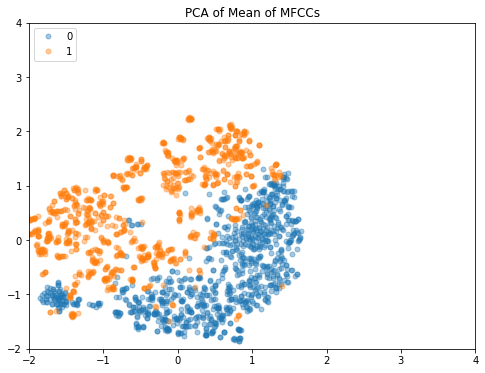

In [117]:

pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)

tsne = TSNE(n_components=2, early_exaggeration=12, n_iter=1000, learning_rate=20,verbose=100, random_state=123)
x_pca = tsne.fit_transform(X) 


scaler = StandardScaler()
x_pca=scaler.fit_transform(x_pca)

labels=np.array(y)
df_pca=pd.DataFrame(x_pca)
df_pca['label']=labels
groups = df_pca.groupby('label')
fig, ax = plt.subplots(figsize=(8,6))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.iloc[:,0], group.iloc[:,1], marker='o', linestyle='', ms=5, alpha=0.4,label=name)
ax.legend(loc='upper left')
ax.set_title('PCA of Mean of MFCCs')
ax.set_xlim([-2,4])
ax.set_ylim([-2,4])
plt.show()

In [64]:
class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats):
        super().__init__()
        self.conv1 = dglnn.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats, aggregator_type='mean',feat_drop=0.01)
        self.conv2 = dglnn.SAGEConv(
            in_feats=hid_feats, out_feats=hid_feats, aggregator_type='mean',feat_drop=0.01)
        self.conv3 = dglnn.SAGEConv(
            in_feats=hid_feats, out_feats=out_feats, aggregator_type='mean')

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
        h = F.relu(h)
        h = self.conv2(graph, h)
        h = F.relu(h)
        h = self.conv2(graph, h)
        h = F.relu(h)
        h = self.conv2(graph, h)
        h = F.relu(h)
        h = self.conv2(graph, h)
        h = F.relu(h)
        h = self.conv3(graph, h)
        
        return h

In [70]:
adj_matrix_ref=np.eye(len(X_train), dtype=int)
wave2vec_manifold=X_train
labels_ref=y_train

In [78]:
from sklearn.decomposition import KernelPCA
from sklearn.neighbors import NearestNeighbors
import networkx as nx
import dgl
from dgl import DGLGraph
import dgl.function as fn
import torch as th
import torch.nn as nn
import dgl.nn as dglnn
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchaudio

Using backend: pytorch


In [109]:
prob=[]
for i in range(len(X_test)):
    if i<=2:
        feature_space =  [adj_matrix_ref, wave2vec_manifold, labels_ref]
        transformer = KernelPCA(n_components=2, kernel='rbf')

        embeds = X_test[i].reshape(len(X_test[i]),1)
        manifold = np.concatenate((feature_space[1],embeds.T))
        kpca_infer = transformer.fit_transform(manifold)
    #     kpca_infer=tsne.fit_transform(manifold ) 
        #%%
        features =  [feature_space, kpca_infer]
        new_manifold =  features[1]
        adj_mat_ref = features[0][0]
        labels_total1 =  features[0][2]
        adj_infer = np.zeros((len(new_manifold),len(new_manifold)))
        num_neigh = 50
        neigh = NearestNeighbors(n_neighbors=num_neigh, radius=0.5)
        neigh.fit(new_manifold)
        adj_infer[:len(adj_mat_ref),:len(adj_mat_ref)] = adj_mat_ref
        dist1, nbors1 =neigh.kneighbors([new_manifold[-1,:]])
        neigh_total = np.array(nbors1).squeeze().flatten()
        neigh_total = np.unique(neigh_total)
        adj_infer[-1,neigh_total] = 1
        adj_infer[neigh_total,-1] = 1
        nx_graph = nx.from_numpy_matrix(adj_infer)
        g_dgl_euclid = dgl.from_networkx(nx_graph)


        ##create the masks for the inference node
        num_samples = len(labels_total1)+1
        mask_full = np.full(num_samples,False)
        mask_full[-1] = True
        infer_mask = th.BoolTensor(mask_full)
        inputs_features = torch.tensor(new_manifold)
        labels_ref = torch.tensor(labels_total1)
        #%%
        model = SAGE(2,100,2).double()
    #     model.load_state_dict(torch.load('model_weights.pt'))
        graph_set =  [g_dgl_euclid, inputs_features, infer_mask, labels_ref, adj_infer]
        graph =  graph_set[0]
        feat = graph_set[1]
        infer_mask =  graph_set[2]
        out =  model(graph, feat)
        probs = torch.softmax(out[infer_mask],1)[-1]
        class1_probs = probs.cpu().detach().numpy()
        prob.append(class1_probs)

In [110]:
prob=pd.DataFrame(prob,columns=['prob_blues','prob_rock'])
prob

,prob_blues,prob_rock
0,0.873503,0.126497
1,0.311918,0.688082
2,0.773456,0.226544


In [105]:
y_pred=prob.prob_blues.apply(lambda x: 0 if x>0.5 else 1)
y_pred

0      1
1      0
2      0
3      0
4      0
      ..
655    0
656    1
657    1
658    1
659    1
Name: prob_blues, Length: 660, dtype: int64

In [106]:
len(y_test)

660

In [107]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

sens = recall_score(y_test, y_pred)
spec = recall_score(1-y_test, 1-y_pred)
dice = 2*spec*sens/(spec+sens)
prec=precision_score(y_test, y_pred)
print('sens:',sens)
print('spec:',spec)
print('dice:',dice)
print('prec:',prec)

sens: 0.4454828660436137
spec: 0.5191740412979351
dice: 0.47951377973383635
prec: 0.4673202614379085
